Homework 6  

Tianran Zhang

The github repository for this Homework is :https://github.com/Creatran/Homework_6.git

1. Generate simulated data, and then perform PCA and K-means clustering on the data.  

a. Grnrrate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables.

In [35]:
import numpy as np
import pandas as pd

In [28]:
rng = np.random.RandomState(1)
def sim_class(n, p, m, s):
    return np.dot(rng.rand(p, p), m + s * rng.randn(p, n)).T
    # np.random.seed(0)
    # return np.random.normal(1, m, (n, p))
X1 = sim_class(20, 50, 1, 5)
X2 = sim_class(20, 50, 2, 5)
X3 = sim_class(20, 50, 3, 5)
X = np.concatenate([X1, X2, X3])

y_true = np.concatenate([np.repeat(0, 20), np.repeat(1, 20), np.repeat(2, 20)])

b. Perform PCA on the 60 observations and plot the first two principal component score vectors. Use a different color to indicate the observations in each of the three classes.

In [29]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 

pca = PCA(n_components=2)
pca.fit(X)

pca_scores = pca.fit_transform(X)

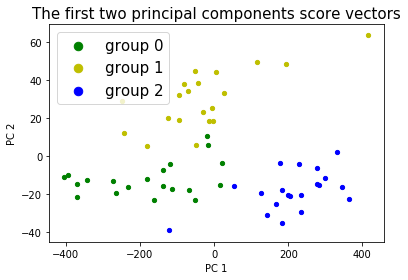

In [116]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

ax = plt.gca()

color = {0: 'g', 1: 'y', 2: 'b'}
for item, value in color.items():
    ax.scatter(pca_scores[:, 0][y_true == item], pca_scores[:, 1][y_true == item],
               c = value, label = 'group ' + str(item) , s = 18)
ax.legend(markerscale = 2, fontsize = 15)    
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("The first two principal components score vectors", fontsize = 15)
plt.show()

c. Perform K-means clustering of the observations with K = 3. How well do the clusters that you obtained in K-means clustering compare to the true class labels?

In [108]:
from sklearn.cluster import KMeans

kmeans_3 =KMeans(n_clusters = 3)
kmeans_3.fit(X)

y_kmeans_3 = kmeans_3.predict(X)
outcome = pd.crosstab(y_true, y_kmeans_3)
outcome.columns = ['Clustering Group 0', 'Clustering Group 1', 'Clustering Group 2']
outcome.index = ['Group 0', 'Group 1', 'Group 2']
outcome

,Clustering Group 0,Clustering Group 1,Clustering Group 2
Group 0,0,12,8
Group 1,3,15,2
Group 2,18,2,0


K-means clustering of the observations perfroms well in group 2 (almost all the items in group 2 are clusterded in one group), but not as well in the first two groups. The items in group 0 are divided into two groups (clustering group 1 and clustering group 2). Most items in group 1 are clusteredd in clustering group 1, whilt others are clustered in clustering group2 and clustering group 0.

d. Perform K-means clustering with K = 2. Describe your results.

In [111]:
kmeans_2 =KMeans(n_clusters = 2)
kmeans_2.fit(X)
y_kmeans_2 = kmeans_2.predict(X)

outcome = pd.crosstab(y_true, y_kmeans_2)
outcome.columns = ['Clustering Group 0', 'Clustering Group 1']
outcome.index = ['Group 0', 'Group 1', 'Group 2']
outcome

,Clustering Group 0,Clustering Group 1
Group 0,20,0
Group 1,17,3
Group 2,1,19


K-means clustering with K = 2 performs well group 2. Almost all the items in group 2 were clustered in one group. However, some the items in group 0 and group 1 ware clustered into one group due to the lack of clusters.

e. Now perform K-means clusterin with K = 4, and describe your results.

In [112]:
kmeans_4 =KMeans(n_clusters = 4)
kmeans_4.fit(X)
y_kmeans_4 = kmeans_4.predict(X)

outcome = pd.crosstab(y_true, y_kmeans_4)
outcome.columns = ['Clustering Group 0', 'Clustering Group 1', 
                   'Clustering Group 2', 'Clustering Group 3']
outcome.index = ['Group 0', 'Group 1', 'Group 2']
outcome

,Clustering Group 0,Clustering Group 1,Clustering Group 2,Clustering Group 3
Group 0,0,8,12,0
Group 1,1,2,15,2
Group 2,7,0,2,11


K-means clustering with K = 4 performs not as well as the former two clusterings. It breaks the three groups into 4 groups. More than half items in group0 and group 1 were clustered in one group (Clustering group 2). The left over items in group0 and group1 were clustered in another group (Clustering group 1). Group2 were divided into two groups (Clustering group 0 and Clustering group 3).

f. Now perform K-means clustering with K = 3 on the first two principal component score vectors, rather than on the raw data. That is, perform K-means clustering on the 60 * 2 matrix of which the first column is the first principal component score vector, and the second column is the second principal component score vector. Comment on the results.

In [113]:
kmeans_pca =KMeans(n_clusters = 3)
kmeans_pca.fit(pca_scores)
y_kmeans_pca = kmeans_pca.predict(pca_scores)

outcome = pd.crosstab(y_true, y_kmeans_pca)
outcome.columns = ['Clustering Group 0', 'Clustering Group 1', 
                   'Clustering Group 2']
outcome.index = ['Group 0', 'Group 1', 'Group 2']
outcome

,Clustering Group 0,Clustering Group 1,Clustering Group 2
Group 0,0,9,11
Group 1,3,3,14
Group 2,18,0,2


The results are similar to that in K-means clustering with K = 3 on the original data. It  perfroms well in group2 that most of its items are clustered in one group. But the most of the items in group 0 and group 1 are clustered in one group (Clustering group 2). It appears as though PCA produces a low-dimensional representation of the original dataset but does not drop much information.

g. Using the scale() function, perform K-means clustering with K = 3 on the data after scaling each variable to have standard deviattion one. How do these results compare to those obtained in (c)? Explain.

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
x_scaled = scaler.transform(X)

In [114]:
kmeans_scale =KMeans(n_clusters = 3)
kmeans_scale.fit(x_scaled)
y_kmeans_scale = kmeans_scale.predict(x_scaled)

outcome = pd.crosstab(y_true, y_kmeans_scale)
outcome.columns = ['Clustering Group 0', 'Clustering Group 1', 
                   'Clustering Group 2']
outcome.index = ['Group 0', 'Group 1', 'Group 2']
outcome

,Clustering Group 0,Clustering Group 1,Clustering Group 2
Group 0,9,0,11
Group 1,3,3,14
Group 2,0,18,2


The results are very close to that in K-means clustering with K = 3. It perfroms well in group2, but not as well in the first two groups. It appears as though scale procedure does not change the results much.